<a href="https://colab.research.google.com/github/Noman-494/Deep_learning/blob/main/The_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from tensorflow.keras.datasets import reuters
 (train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
train_labels[0]

3

In [14]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Assuming train_data and test_data are already defined
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [16]:
 from tensorflow.keras.utils import to_categorical
 y_train = to_categorical(train_labels)
 y_test = to_categorical(test_labels)

In [17]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [21]:
x_train.shape

(8982, 10000)

In [23]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:1000] # Removed extra indentation
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4064 - loss: 3.1268 - val_accuracy: 0.6070 - val_loss: 1.7723
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6579 - loss: 1.5974 - val_accuracy: 0.6990 - val_loss: 1.3726
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7319 - loss: 1.2283 - val_accuracy: 0.7360 - val_loss: 1.1959
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7850 - loss: 0.9773 - val_accuracy: 0.7700 - val_loss: 1.0849
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8263 - loss: 0.7930 - val_accuracy: 0.7790 - val_loss: 1.0014
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8542 - loss: 0.6670 - val_accuracy: 0.7880 - val_loss: 0.9584
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8904 - loss: 0.5528 - val_accuracy: 0.8030 - val_loss: 0.9387
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9056 - loss: 0.4654 - val_accuracy: 0.8080 - 

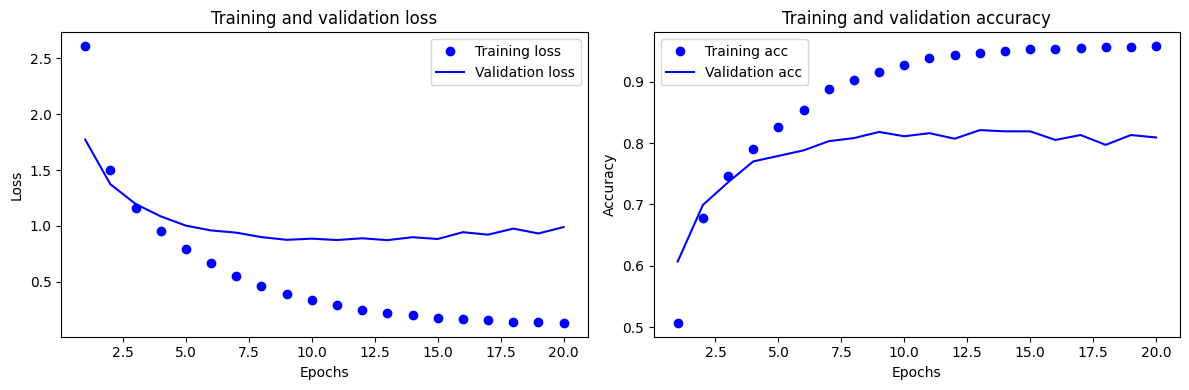

In [24]:
# prompt: prepare graph between epoch and accurcy and epoch and loss and initilize the model where  validation accurcy and accurcy are same and similarly with loss purpose is to reach at best accurcy and minimal loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



Optimal number of epochs based on validation loss: 13


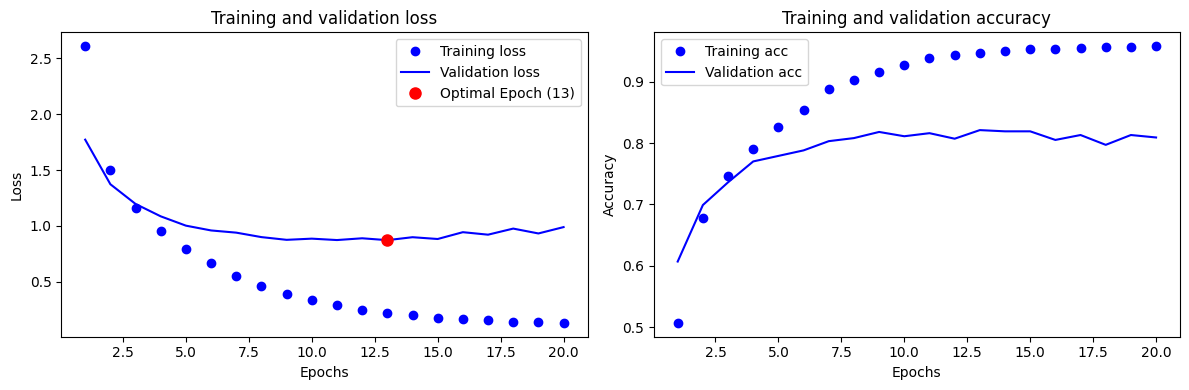

In [26]:
# prompt:  Find the optimal number of epochs from the plot

import matplotlib.pyplot as plt

# Assuming 'history' object from model.fit is available

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# Find the epoch with the minimum validation loss
optimal_epoch = np.argmin(val_loss) + 1  # Add 1 to convert index to epoch number

print(f"Optimal number of epochs based on validation loss: {optimal_epoch}")

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(optimal_epoch, val_loss[optimal_epoch -1], 'ro', markersize=8, label=f'Optimal Epoch ({optimal_epoch})') #Highlight Optimal Epoch
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
# Re-initialize and re-train the model for optimal performance
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])



model.fit(x_train, y_train, epochs=optimal_epoch, batch_size=512)



Epoch 1/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.3951 - loss: 3.1408
Epoch 2/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6611 - loss: 1.5703
Epoch 3/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7415 - loss: 1.1768
Epoch 4/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7944 - loss: 0.9646
Epoch 5/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8263 - loss: 0.7856
Epoch 6/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8632 - loss: 0.6418
Epoch 7/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8864 - loss: 0.5378
Epoch 8/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9021 - loss: 0.4610
Epoch 9/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9179 - loss: 0.3805
Epoch 10/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9340 - loss: 0.3177
Epoch 11/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9403 - loss: 0.2751
Epoch 12/13
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy:

In [30]:
results = model.evaluate(x_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.8994


[0.9290940761566162, 0.7960819005966187]

In [31]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

In [32]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [34]:
predictions[0]

array([3.0900769e-06, 1.8480863e-05, 2.8076338e-06, 2.0033452e-01,
       7.8660280e-01, 1.6584753e-06, 5.3808958e-06, 1.0557671e-05,
       1.1671303e-02, 3.5081939e-06, 1.4967415e-07, 3.7573252e-04,
       1.7281239e-06, 1.8508803e-05, 2.3740188e-06, 7.2659589e-08,
       2.8619260e-04, 3.5834837e-05, 5.7169091e-06, 3.5996643e-05,
       1.9023981e-04, 2.3592118e-05, 1.2919149e-06, 2.5336200e-05,
       2.5174322e-07, 4.7650046e-06, 3.2045173e-06, 3.1777427e-06,
       2.5750935e-06, 3.3146389e-05, 7.4272152e-06, 1.0608012e-05,
       1.6712152e-06, 4.1873514e-07, 1.0756600e-06, 4.4968929e-06,
       2.8395552e-05, 1.7345997e-06, 1.2501421e-06, 2.1169096e-04,
       1.4572086e-07, 2.3017734e-05, 2.9665271e-06, 1.0421850e-07,
       5.4030454e-07, 5.1075642e-07], dtype=float32)

In [35]:
np.argmax(predictions[0])

4

In [36]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
import pandas as pd
import numpy as np

# Assuming 'x_test', 'y_test', 'model', and 'predictions' are defined from the previous code

# Get predictions for the first five samples
first_five_predictions = model.predict(x_test[:5])

# Get the predicted class labels
predicted_labels = np.argmax(first_five_predictions, axis=1)

# Get the actual class labels (assuming one-hot encoded labels in y_test)
actual_labels = np.argmax(y_test[:5], axis=1) # Convert y_test to 1-D by taking argmax along axis 1

# Create a DataFrame
df = pd.DataFrame({
    'Actual Label': actual_labels, # Use the extracted actual labels
    'Predicted Label': predicted_labels
})

# Display the DataFrame
df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


,Actual Label,Predicted Label
0,3,4
1,10,10
2,1,1
3,4,16
4,4,13
